In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
from scipy.io import loadmat,savemat
from scipy.signal import deconvolve, savgol_filter



from plotnine import *
# import plotly

# import h5py


from pymer4 import Lmer, Lm


from os import listdir


In [9]:
fpath = './heterogeneity/'


norms = loadmat(fpath+'l2norms.mat')

norms.keys()

dict_keys(['__header__', '__version__', '__globals__', 'norms_dec_real', 'norms_inc_real', 'norms_dec_ksyn0', 'norms_dec_ksyn5', 'norms_dec_linear', 'norms_dec_step', 'norms_inc_ksyn0', 'norms_inc_ksyn5', 'norms_inc_linear', 'norms_inc_step'])

In [10]:
# pd.DataFrame({'norm':norms['norms_dec_linear']})
norms['norms_inc_linear'].T

array([[0.07285168, 0.12036571, 0.09701804, 0.07734529, 0.12963807,
        0.10291054, 0.12140618, 0.10599523, 0.08384925, 0.06958481,
        0.06900523, 0.08742025, 0.13070285, 0.10145345, 0.11964786,
        0.11346377, 0.12245953, 0.14314111, 0.12063583, 0.12254889,
        0.16968342, 0.08274002, 0.09870107, 0.11320479, 0.13147424,
        0.1254178 , 0.13590513, 0.09160373, 0.10817735, 0.1320486 ,
        0.17023533, 0.13935806, 0.11041802, 0.08762789, 0.14011385,
        0.11206185, 0.14237963, 0.0755991 , 0.14257433, 0.09119588,
        0.1039455 , 0.08890136, 0.1439862 , 0.13473942, 0.13266553,
        0.14391504, 0.15164217, 0.13943855, 0.09588697, 0.16842192,
        0.12439876, 0.0865132 , 0.12827516, 0.08426409, 0.11342145,
        0.09911907, 0.10696681, 0.11599753, 0.09542148, 0.08445586,
        0.1108109 , 0.15104768, 0.14783722, 0.16528785, 0.17672985,
        0.09256658, 0.12327464, 0.1192582 , 0.14618484, 0.06315603,
        0.10017395, 0.15332408, 0.14608681, 0.13

In [11]:
norms2extract = [
    'norms_inc_linear',
    'norms_dec_linear',
    'norms_inc_step',
    'norms_dec_step',
    'norms_inc_ksyn0',
    'norms_dec_ksyn0',
    'norms_inc_ksyn5',
    'norms_dec_ksyn5',
    'norms_inc_real',
    'norms_dec_real',
]

frames = []

for norms2use in norms2extract:
    print(norms2use)
    
    
    df_temp = pd.DataFrame({
        'norm':norms[norms2use].flatten()
    })
    
    
    nInfo = norms2use.split('_')
    
    df_temp['incdec'] = nInfo[1]
    df_temp['type'] = nInfo[2]
    
    frames.append(df_temp)
    
df = pd.concat(frames)

    

norms_inc_linear
norms_dec_linear
norms_inc_step
norms_dec_step
norms_inc_ksyn0
norms_dec_ksyn0
norms_inc_ksyn5
norms_dec_ksyn5
norms_inc_real
norms_dec_real


/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_ydensity : Removed 2 rows containing non-finite values.


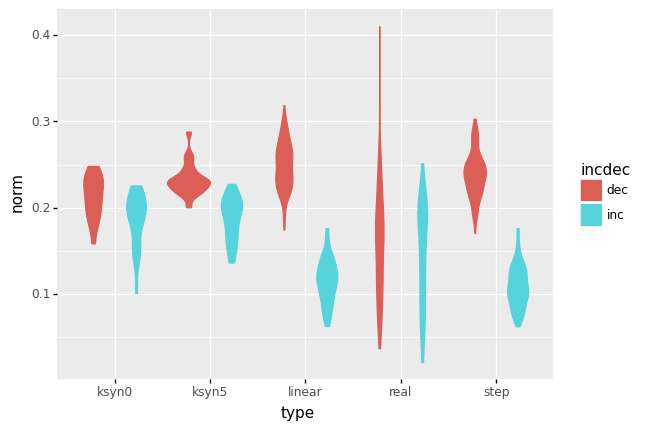

<ggplot: (444879041)>

In [12]:
# df_temp = df[~df.type.isin(['ksyn0','ksyn5'])]

p = (ggplot(df,aes(x='type',y='norm',color='incdec',fill='incdec')) +
     
     geom_violin() 
    )

p

In [29]:
df.reset_index(drop=True).dropna()

df['condition'] = df.incdec.values + ' ' + df.type.values

df

,norm,incdec,type,condition
0,0.072852,inc,linear,inc linear
1,0.120366,inc,linear,inc linear
2,0.097018,inc,linear,inc linear
3,0.077345,inc,linear,inc linear
4,0.129638,inc,linear,inc linear
...,...,...,...,...
176,0.082190,dec,real,dec real
177,0.048989,dec,real,dec real
178,0.183180,dec,real,dec real
179,0.125166,dec,real,dec real


In [22]:
model = Lm('norm ~ 0 + condition',data=df.dropna())

print(model.fit())

Formula: norm~0+condition

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 716	 R^2: 0.951	 R^2_adj: 0.950

Log-likelihood: 1262.064 	 AIC: -2504.128	 BIC: -2458.391

Fixed effects:

                       Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  P-val  \
condition[dec ksyn0]      0.213   0.194    0.232  0.010  706  22.206    0.0   
condition[dec ksyn5]      0.233   0.215    0.252  0.009  706  24.955    0.0   
condition[dec linear]     0.250   0.241    0.258  0.004  706  59.680    0.0   
condition[dec real]       0.161   0.155    0.167  0.003  706  51.758    0.0   
condition[dec step]       0.239   0.231    0.248  0.004  706  57.257    0.0   
condition[inc ksyn0]      0.186   0.167    0.205  0.010  706  19.386    0.0   
condition[inc ksyn5]      0.188   0.169    0.206  0.009  706  20.068    0.0   
condition[inc linear]     0.116   0.108    0.124  0.004  706  27.744    0.0   
condition[inc real]       0.147

/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/model_preds/L2norms.png
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_ydensity : Removed 2 rows containing non-finite values.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/model_preds/L2norms.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_ydensity : Removed 2 rows containing non-finite values.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/layer.py:324

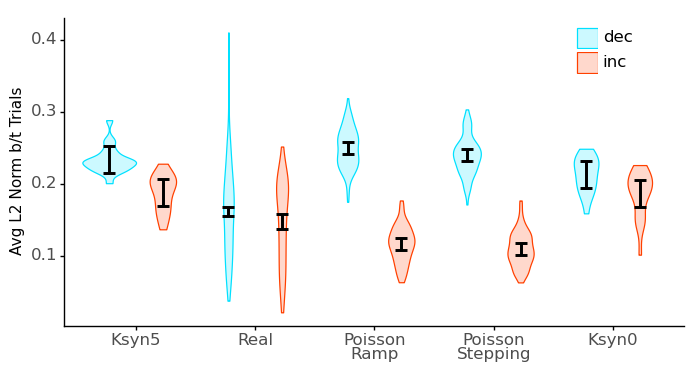

<ggplot: (446049856)>

In [59]:
df_normEst = pd.DataFrame({
    'norm':model.coefs.Estimate,
    'CIlow':model.coefs['2.5_ci'],
    'CIhigh':model.coefs['97.5_ci'],
    'type':['ksyn0','ksyn5','linear','real','step']*2,
    'incdec':['dec']*5 + ['inc']*5
})

df['CIlow'] = np.nan
df['CIhigh'] = np.nan

p=(ggplot(df_normEst,aes(x='type',y='norm',ymin='CIlow',ymax='CIhigh',color='incdec',fill='incdec')) +

#    geom_line(aes(y='eeg_base'),color='green') +
  
   geom_violin(data=df,alpha=0.2,position=position_dodge(0.9))+
#    geom_point(position=position_dodge(0.9),color='black')+
   geom_errorbar(position=position_dodge(0.9),color='black',width=0.2,size=1.2)+

#    scale_y_continuous(name='EEG Voltage (mV; green); Pupil Size (AU; black)',limits=(-5,5),breaks=np.arange(-7.5,5.1,2.5)) +
#  labs(title='Anticipatory EEG and Pupil Dilations') +
   scale_x_discrete(limits=['ksyn5','real','linear','step','ksyn0'],
                   labels=['Ksyn5','Real','Poisson\nRamp','Poisson\nStepping','Ksyn0'])+
   scale_y_continuous(name='Avg L2 Norm b/t Trials')+
   scale_color_manual(values = ['#00E1FF','#FF4000'])+
   scale_fill_manual(values = ['#00E1FF','#FF4000']) +
 theme_classic() +
   theme(axis_title_x = element_blank(),
        legend_position = (0.8,0.8),
        legend_title = element_blank(),
         legend_text = element_text(size=12),
        axis_text = element_text(size=12),
        figure_size = (8,4))

   
)

p.save('figures/model_preds/L2norms.png')
p.save('figures/model_preds/L2norms.svg')
p

/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/model_preds/L2norms_restrict.png
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/model_preds/L2norms_restrict.svg


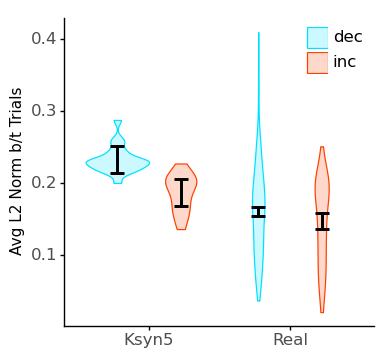

<ggplot: (445841538)>

In [61]:
df_normEst = pd.DataFrame({
    'norm':model.coefs.Estimate,
    'CIlow':model.coefs['2.5_ci'],
    'CIhigh':model.coefs['97.5_ci'],
    'type':['ksyn0','ksyn5','linear','real','step']*2,
    'incdec':['dec']*5 + ['inc']*5
})

df['CIlow'] = np.nan
df['CIhigh'] = np.nan

p=(ggplot(df_normEst[df_normEst.type.isin(['ksyn5','real'])],aes(x='type',y='norm',ymin='CIlow',ymax='CIhigh',color='incdec',fill='incdec')) +

#    geom_line(aes(y='eeg_base'),color='green') +
  
   geom_violin(data=df[df.type.isin(['ksyn5','real'])],alpha=0.2,position=position_dodge(0.9))+
#    geom_point(position=position_dodge(0.9),color='black')+
   geom_errorbar(position=position_dodge(0.9),color='black',width=0.2,size=1.2)+

#    scale_y_continuous(name='EEG Voltage (mV; green); Pupil Size (AU; black)',limits=(-5,5),breaks=np.arange(-7.5,5.1,2.5)) +
#  labs(title='Anticipatory EEG and Pupil Dilations') +
   scale_x_discrete(limits=['ksyn5','real'],
                   labels=['Ksyn5','Real'])+
   scale_y_continuous(name='Avg L2 Norm b/t Trials')+
   scale_color_manual(values = ['#00E1FF','#FF4000'])+
   scale_fill_manual(values = ['#00E1FF','#FF4000']) +
 theme_classic() +
   theme(axis_title_x = element_blank(),
        legend_position = (0.8,0.8),
        legend_title = element_blank(),
         legend_text = element_text(size=12),
        axis_text = element_text(size=12),
        figure_size = (4,4))

   
)

p.save('figures/model_preds/L2norms_restrict.png')
p.save('figures/model_preds/L2norms_restrict.svg')
p